In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("sample_data/mnist_train_small.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=df.iloc[:,1:].values
y=df[0].values


In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x,y)

MLPClassifier()

In [ ]:
test=pd.read_csv("sample_data/mnist_test.csv",header=None)
x_test=test.iloc[:,1:].values
y_test=test[0].values

In [ ]:

y_pred=model.predict(x_test)
np.mean(y_pred==y_test)

np.float64(0.9442)










pytorch,tensorflow, keras

In [ ]:
from tensorflow.keras import models, layers
model=models.Sequential()
model.add(layers.Dense(100,activation='relu',input_shape=(784,)))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#change y format
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)
y_test=to_categorical(y_test)
y.shape,y_test.shape

((20000, 10), (10000, 10))

In [ ]:
model.compile(optimizer='adam',metrics=['acc'],loss='categorical_crossentropy')
model.fit(x,y,epochs=5,validation_data=(x_test,y_test))


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.6297 - loss: 9.2259 - val_acc: 0.8186 - val_loss: 0.9251
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8233 - loss: 0.7366 - val_acc: 0.8759 - val_loss: 0.6855
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8777 - loss: 0.4849 - val_acc: 0.8468 - val_loss: 0.6419
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8901 - loss: 0.4195 - val_acc: 0.8689 - val_loss: 0.5206
Epoch 5/5
418/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9001 - loss: 0.3594

In [ ]:
from tensorflow.keras import models, layers
model=models.Sequential()
model.add(layers.Conv2D(10,(3,3),input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 16)     │         1,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,216 (184.44 KB)

 Trainable params: 47,216 (184.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
X=x.reshape(-1,28,28,1)/255
X_test=x_test.reshape(-1,28,28,1)/255

In [ ]:
model.fit(X,y,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.8949 - loss: 0.4768 - val_acc: 0.9805 - val_loss: 0.0648
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9849 - loss: 0.0471 - val_acc: 0.9835 - val_loss: 0.0559
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9914 - loss: 0.0243 - val_acc: 0.9835 - val_loss: 0.0554
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9944 - loss: 0.0156 - val_acc: 0.9844 - val_loss: 0.0550
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9956 - loss: 0.0120 - val_acc: 0.9819 - val_loss: 0.0795
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9978 - loss: 0.0067 - val_acc: 0.9859 - val_loss: 0.0611
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9983 - loss: 0.0053 - val_acc: 0.9858 - val_loss: 0.0672
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9988 - loss: 0.0046 - val_acc: 0.9866 - val_loss: 0.0699
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - ac

In [ ]:
X_test.max()

np.int64(255)

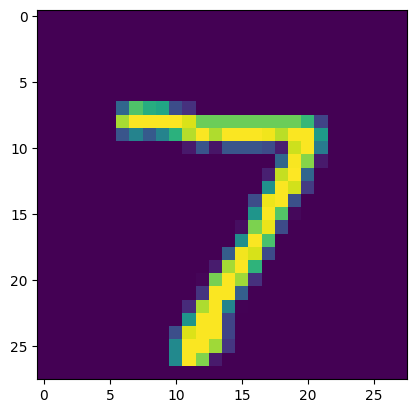

In [ ]:
X_test[0]
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_44']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


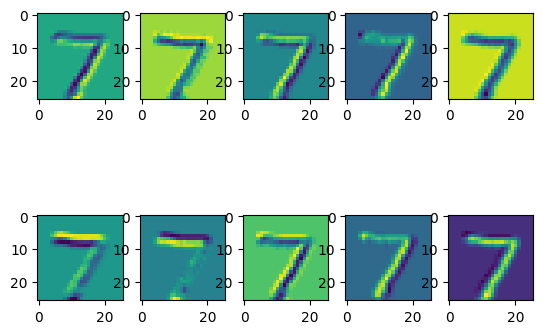

In [ ]:
output=[]
for layer in model.layers:
  output.append(layer.output)

vis=models.Model(inputs=model.inputs,outputs=output)
res=vis(X_test[0].reshape(-1,28,28,1))
test=np.array(res[0]).reshape((26,26,10))
fig,axs=plt.subplots(2,5)
for i in range(10):
  axs[i//5,i%5].imshow(test[:,:,i])



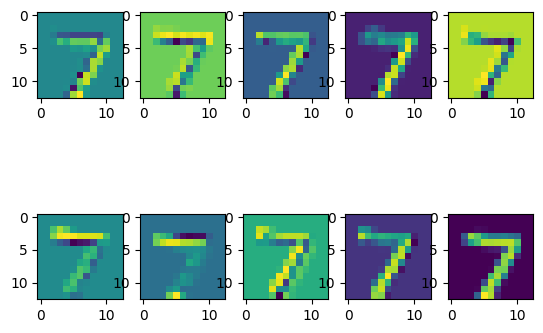

In [ ]:
test=np.array(res[1]).reshape((13,13,10))
fig,axs=plt.subplots(2,5)
for i in range(10):
  axs[i//5,i%5].imshow(test[:,:,i])

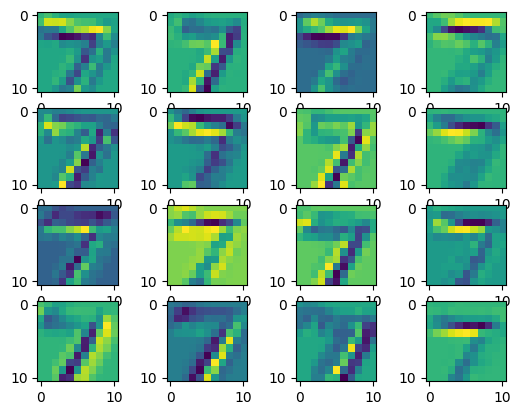

In [ ]:
test=np.array(res[2]).reshape((11,11,16))
fig,axs=plt.subplots(4,4)
for i in range(16):
  axs[i//4,i%4].imshow(test[:,:,i])

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
vgg=VGG16()
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
img=load_img("111.jpg",target_size=(224,224,3))
img=img_to_array(img)
input=preprocess_input(img)
input=input.reshape(1,224,224,3)
res=vgg.predict(input)
decode_predictions(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


[[('n03935335', 'piggy_bank', np.float32(1.0)),
  ('n03908714', 'pencil_sharpener', np.float32(4.315015e-08)),
  ('n04254120', 'soap_dispenser', np.float32(4.4610386e-09)),
  ('n04442312', 'toaster', np.float32(1.2880595e-09)),
  ('n04131690', 'saltshaker', np.float32(4.3285373e-10))]]